*Creado por:*

*Isabel Maniega*

****

En esta introducción de Deep Learning haremos un simple ejercicio para comprender el mecanismo.

La idea es ver los contenidos iniciales aplicados a algunas de las puertas lógicas:
    
* AND

* OR

* XOR

****

In [1]:
import warnings
warnings.filterwarnings('ignore')

# PUERTA OR

**Si cualquiera de las entradas es 1 entonces la salida es 1**

In [2]:
import pandas as pd
df = pd.DataFrame({'Entrada_1': [0, 0, 1, 1],
                   'Entrada_2': [0, 1, 0, 1],
                   'Salida_12': [0, 1, 1, 1]})

df

,Entrada_1,Entrada_2,Salida_12
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


****

In [ ]:
# Entonces trataremos de simular esto con Deep Learning usando ANN

# ANN viene de Artificial Neural Networks (Redes Neuronales Artificiales)

# Existen muchas más cosas en este tema, pero esta es una de ellas.

In [3]:
import numpy as np

In [4]:
training_data = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
training_data

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [5]:
target_data = np.array([[0], [1], [1], [1]], "float32")
target_data

array([[0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Tensorflow

In [7]:
# pip install tensorflow 

Error de:  I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.

Solucionarlo con:

In [ ]:
# pip install tensorflow[and-cuda]

In [ ]:
# https://pypi.org/project/tensorflow/
# pip install tensorflow --user

# necesario añadir el --user

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-10 12:48:03.501107: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-10 12:48:03.705435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752144483.786546   64434 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752144483.816470   64434 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752144483.948262   64434 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [9]:
training_data.shape # 4 filas 2 columnas (2 variables)

(4, 2)

In [10]:
len(training_data)

4

In [11]:
target_data.shape # 1 columna

(4, 1)

In [12]:
# from tensorflow.keras import Sequential

model = Sequential()

# segun esto:
# input_dim es el numero de columnas
# 4 es el numero de filas, osea len(df)
# 1 es la salida, que es 0 o 1 pero es una sola salida.

model.add(Dense(4, input_dim = 2, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

I0000 00:00:1752144769.564351   64434 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4225 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics=['binary_accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(training_data, target_data, epochs=4000, verbose=2)

Epoch 1/4000


I0000 00:00:1752145065.828164   96082 service.cc:152] XLA service 0x7a2aa4014b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752145065.828184   96082 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-07-10 12:57:45.849296: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752145065.917302   96082 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 - 1s - 681ms/step - binary_accuracy: 0.7500 - loss: 0.2133
Epoch 2/4000
1/1 - 0s - 35ms/step - binary_accuracy: 0.5000 - loss: 0.2125
Epoch 3/4000
1/1 - 0s - 38ms/step - binary_accuracy: 0.5000 - loss: 0.2117
Epoch 4/4000
1/1 - 0s - 31ms/step - binary_accuracy: 0.5000 - loss: 0.2110
Epoch 5/4000
1/1 - 0s - 32ms/step - binary_accuracy: 0.5000 - loss: 0.2102
Epoch 6/4000
1/1 - 0s - 32ms/step - binary_accuracy: 0.5000 - loss: 0.2094


I0000 00:00:1752145066.108082   96082 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 7/4000
1/1 - 0s - 45ms/step - binary_accuracy: 0.5000 - loss: 0.2087
Epoch 8/4000
1/1 - 0s - 53ms/step - binary_accuracy: 0.5000 - loss: 0.2079
Epoch 9/4000
1/1 - 0s - 54ms/step - binary_accuracy: 0.5000 - loss: 0.2072
Epoch 10/4000
1/1 - 0s - 49ms/step - binary_accuracy: 0.5000 - loss: 0.2064
Epoch 11/4000
1/1 - 0s - 30ms/step - binary_accuracy: 0.5000 - loss: 0.2057
Epoch 12/4000
1/1 - 0s - 45ms/step - binary_accuracy: 0.5000 - loss: 0.2050
Epoch 13/4000
1/1 - 0s - 46ms/step - binary_accuracy: 0.5000 - loss: 0.2043
Epoch 14/4000
1/1 - 0s - 31ms/step - binary_accuracy: 0.5000 - loss: 0.2036
Epoch 15/4000
1/1 - 0s - 30ms/step - binary_accuracy: 0.5000 - loss: 0.2029
Epoch 16/4000
1/1 - 0s - 29ms/step - binary_accuracy: 0.5000 - loss: 0.2022
Epoch 17/4000
1/1 - 0s - 41ms/step - binary_accuracy: 0.5000 - loss: 0.2015
Epoch 18/4000
1/1 - 0s - 58ms/step - binary_accuracy: 0.5000 - loss: 0.2008
Epoch 19/4000
1/1 - 0s - 50ms/step - binary_accuracy: 0.5000 - loss: 0.2001
Epoch 20/4000
1

Epoch 1984/5000
1/1 - 0s - loss: 0.0129 - binary_accuracy: 1.0000 - 786us/epoch - 786us/step
Epoch 1985/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 870us/epoch - 870us/step
Epoch 1986/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 1987/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 1988/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 862us/epoch - 862us/step
Epoch 1989/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 727us/epoch - 727us/step
Epoch 1990/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 681us/epoch - 681us/step
Epoch 1991/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 740us/epoch - 740us/step
Epoch 1992/5000
1/1 - 0s - loss: 0.0128 - binary_accuracy: 1.0000 - 710us/epoch - 710us/step
Epoch 1993/5000
1/1 - 0s - loss: 0.0127 - binary_accuracy: 1.0000 - 772us/epoch - 772us/step
Epoch 1994/5000
1/1 - 0s - loss: 0.0127 - binary_accuracy: 1.0000 - 712us/epoc

1/1 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - 964us/epoch - 964us/step
Epoch 2075/5000
1/1 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - 936us/epoch - 936us/step
Epoch 2076/5000
1/1 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2077/5000
1/1 - 0s - loss: 0.0118 - binary_accuracy: 1.0000 - 972us/epoch - 972us/step
Epoch 2078/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2079/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2080/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2081/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2082/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 937us/epoch - 937us/step
Epoch 2083/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 759us/epoch - 759us/step
Epoch 2084/5000
1/1 - 0s - loss: 0.0117 - binary_accuracy: 1.0000 - 714us/epoch - 714us/step
Epoch 2085/50

Epoch 2164/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 652us/epoch - 652us/step
Epoch 2165/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2166/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2167/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2168/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 841us/epoch - 841us/step
Epoch 2169/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 927us/epoch - 927us/step
Epoch 2170/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 890us/epoch - 890us/step
Epoch 2171/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 865us/epoch - 865us/step
Epoch 2172/5000
1/1 - 0s - loss: 0.0108 - binary_accuracy: 1.0000 - 928us/epoch - 928us/step
Epoch 2173/5000
1/1 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2174/5000
1/1 - 0s - loss: 0.0107 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/st

1/1 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - 892us/epoch - 892us/step
Epoch 2255/5000
1/1 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - 912us/epoch - 912us/step
Epoch 2256/5000
1/1 - 0s - loss: 0.0100 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2257/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2258/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2259/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2260/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2261/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2262/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2263/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2264/5000
1/1 - 0s - loss: 0.0099 - binary_accuracy: 1.0000 - 929us/epoch - 929us/step
Epoch 2265/5000
1/1 - 0s 

Epoch 2345/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 774us/epoch - 774us/step
Epoch 2346/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 937us/epoch - 937us/step
Epoch 2347/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2348/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 909us/epoch - 909us/step
Epoch 2349/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 762us/epoch - 762us/step
Epoch 2350/5000
1/1 - 0s - loss: 0.0092 - binary_accuracy: 1.0000 - 708us/epoch - 708us/step
Epoch 2351/5000
1/1 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - 782us/epoch - 782us/step
Epoch 2352/5000
1/1 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - 718us/epoch - 718us/step
Epoch 2353/5000
1/1 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - 690us/epoch - 690us/step
Epoch 2354/5000
1/1 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - 736us/epoch - 736us/step
Epoch 2355/5000
1/1 - 0s - loss: 0.0091 - binary_accuracy: 1.0000 - 669us/

Epoch 2435/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 718us/epoch - 718us/step
Epoch 2436/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 940us/epoch - 940us/step
Epoch 2437/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 865us/epoch - 865us/step
Epoch 2438/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 824us/epoch - 824us/step
Epoch 2439/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 785us/epoch - 785us/step
Epoch 2440/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 834us/epoch - 834us/step
Epoch 2441/5000
1/1 - 0s - loss: 0.0085 - binary_accuracy: 1.0000 - 766us/epoch - 766us/step
Epoch 2442/5000
1/1 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2443/5000
1/1 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - 766us/epoch - 766us/step
Epoch 2444/5000
1/1 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - 824us/epoch - 824us/step
Epoch 2445/5000
1/1 - 0s - loss: 0.0084 - binary_accuracy: 1.0000 - 2ms/ep

1/1 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2526/5000
1/1 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2527/5000
1/1 - 0s - loss: 0.0079 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2528/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2529/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 823us/epoch - 823us/step
Epoch 2530/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 838us/epoch - 838us/step
Epoch 2531/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 758us/epoch - 758us/step
Epoch 2532/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 760us/epoch - 760us/step
Epoch 2533/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 856us/epoch - 856us/step
Epoch 2534/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2535/5000
1/1 - 0s - loss: 0.0078 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2536/5000
1

1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 738us/epoch - 738us/step
Epoch 2616/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 967us/epoch - 967us/step
Epoch 2617/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 774us/epoch - 774us/step
Epoch 2618/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 971us/epoch - 971us/step
Epoch 2619/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2620/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 766us/epoch - 766us/step
Epoch 2621/5000
1/1 - 0s - loss: 0.0073 - binary_accuracy: 1.0000 - 728us/epoch - 728us/step
Epoch 2622/5000
1/1 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - 716us/epoch - 716us/step
Epoch 2623/5000
1/1 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - 660us/epoch - 660us/step
Epoch 2624/5000
1/1 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - 704us/epoch - 704us/step
Epoch 2625/5000
1/1 - 0s - loss: 0.0072 - binary_accuracy: 1.0000 - 705us/epoch - 705us/st

Epoch 2706/5000
1/1 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2707/5000
1/1 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2708/5000
1/1 - 0s - loss: 0.0068 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2709/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2710/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2711/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2712/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2713/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2714/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 988us/epoch - 988us/step
Epoch 2715/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2716/5000
1/1 - 0s - loss: 0.0067 - binary_accuracy: 1.0000 - 907us/epoch - 907us/step
Epoch 2717/50

1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2797/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2798/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2799/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2800/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 990us/epoch - 990us/step
Epoch 2801/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2802/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 937us/epoch - 937us/step
Epoch 2803/5000
1/1 - 0s - loss: 0.0063 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2804/5000
1/1 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2805/5000
1/1 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2806/5000
1/1 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2807/5000
1/1 - 0s - lo

1/1 - 0s - loss: 0.0059 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2888/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 2889/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2890/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 920us/epoch - 920us/step
Epoch 2891/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2892/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 802us/epoch - 802us/step
Epoch 2893/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 709us/epoch - 709us/step
Epoch 2894/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 723us/epoch - 723us/step
Epoch 2895/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 700us/epoch - 700us/step
Epoch 2896/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 649us/epoch - 649us/step
Epoch 2897/5000
1/1 - 0s - loss: 0.0058 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2898/50

1/1 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2978/5000
1/1 - 0s - loss: 0.0055 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 2979/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 954us/epoch - 954us/step
Epoch 2980/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 839us/epoch - 839us/step
Epoch 2981/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 853us/epoch - 853us/step
Epoch 2982/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 815us/epoch - 815us/step
Epoch 2983/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 707us/epoch - 707us/step
Epoch 2984/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 666us/epoch - 666us/step
Epoch 2985/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 927us/epoch - 927us/step
Epoch 2986/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 2987/5000
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 298

Epoch 3067/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 750us/epoch - 750us/step
Epoch 3068/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 799us/epoch - 799us/step
Epoch 3069/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 672us/epoch - 672us/step
Epoch 3070/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 665us/epoch - 665us/step
Epoch 3071/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 668us/epoch - 668us/step
Epoch 3072/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3073/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3074/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3075/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3076/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3077/5000
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
E

1/1 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - 702us/epoch - 702us/step
Epoch 3157/5000
1/1 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3158/5000
1/1 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3159/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3160/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3161/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 851us/epoch - 851us/step
Epoch 3162/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3163/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 855us/epoch - 855us/step
Epoch 3164/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 901us/epoch - 901us/step
Epoch 3165/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3166/5000
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - 976us/epoch - 976us/step
Epoch 3167/5000
1

Epoch 3246/5000
1/1 - 0s - loss: 0.0045 - binary_accuracy: 1.0000 - 732us/epoch - 732us/step
Epoch 3247/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 645us/epoch - 645us/step
Epoch 3248/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 835us/epoch - 835us/step
Epoch 3249/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 781us/epoch - 781us/step
Epoch 3250/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3251/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 885us/epoch - 885us/step
Epoch 3252/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 869us/epoch - 869us/step
Epoch 3253/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 912us/epoch - 912us/step
Epoch 3254/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3255/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3256/5000
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - 1ms/epoch - 1m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 3648/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3649/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3650/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3651/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3652/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3653/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 866us/epoch - 866us/step
Epoch 3654/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 750us/epoch - 750us/step
Epoch 3655/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3656/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3657/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3658/5000
1/1 - 0s - loss: 0.0033 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3659/50

Epoch 3739/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 942us/epoch - 942us/step
Epoch 3740/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3741/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 740us/epoch - 740us/step
Epoch 3742/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 833us/epoch - 833us/step
Epoch 3743/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 897us/epoch - 897us/step
Epoch 3744/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 917us/epoch - 917us/step
Epoch 3745/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3746/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3747/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3748/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 853us/epoch - 853us/step
Epoch 3749/5000
1/1 - 0s - loss: 0.0031 - binary_accuracy: 1.0000 - 960us/epoch - 960u

Epoch 3830/5000
1/1 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3831/5000
1/1 - 0s - loss: 0.0030 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3832/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3833/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3834/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3835/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 796us/epoch - 796us/step
Epoch 3836/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 797us/epoch - 797us/step
Epoch 3837/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 932us/epoch - 932us/step
Epoch 3838/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 3839/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 999us/epoch - 999us/step
Epoch 3840/5000
1/1 - 0s - loss: 0.0029 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch

Epoch 3920/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 3921/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 842us/epoch - 842us/step
Epoch 3922/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 721us/epoch - 721us/step
Epoch 3923/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 677us/epoch - 677us/step
Epoch 3924/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 847us/epoch - 847us/step
Epoch 3925/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 767us/epoch - 767us/step
Epoch 3926/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 725us/epoch - 725us/step
Epoch 3927/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 801us/epoch - 801us/step
Epoch 3928/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 679us/epoch - 679us/step
Epoch 3929/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 988us/epoch - 988us/step
Epoch 3930/5000
1/1 - 0s - loss: 0.0028 - binary_accuracy: 1.0000 - 2ms/ep

1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 686us/epoch - 686us/step
Epoch 4011/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 851us/epoch - 851us/step
Epoch 4012/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4013/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 869us/epoch - 869us/step
Epoch 4014/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 957us/epoch - 957us/step
Epoch 4015/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4016/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 926us/epoch - 926us/step
Epoch 4017/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 870us/epoch - 870us/step
Epoch 4018/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 731us/epoch - 731us/step
Epoch 4019/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 788us/epoch - 788us/step
Epoch 4020/5000
1/1 - 0s - loss: 0.0026 - binary_accuracy: 1.0000 - 767us/epoch - 767us/step
E

1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 974us/epoch - 974us/step
Epoch 4101/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4102/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4103/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4104/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4105/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4106/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 938us/epoch - 938us/step
Epoch 4107/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4108/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4109/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4110/5000
1/1 - 0s - loss: 0.0025 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4111/5000
1/1 - 0s - lo

Epoch 4191/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4192/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4193/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4194/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4195/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4196/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4197/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4198/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4199/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4200/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4201/5000
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - 921us/epoch - 921us/step
Epoch 4202/5000
1

Epoch 4282/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 848us/epoch - 848us/step
Epoch 4283/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 757us/epoch - 757us/step
Epoch 4284/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 823us/epoch - 823us/step
Epoch 4285/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 777us/epoch - 777us/step
Epoch 4286/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 760us/epoch - 760us/step
Epoch 4287/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4288/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 4289/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 968us/epoch - 968us/step
Epoch 4290/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 963us/epoch - 963us/step
Epoch 4291/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 937us/epoch - 937us/step
Epoch 4292/5000
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - 1ms/epoch 

Epoch 4372/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 948us/epoch - 948us/step
Epoch 4373/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 813us/epoch - 813us/step
Epoch 4374/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 789us/epoch - 789us/step
Epoch 4375/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 831us/epoch - 831us/step
Epoch 4376/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 735us/epoch - 735us/step
Epoch 4377/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 708us/epoch - 708us/step
Epoch 4378/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 725us/epoch - 725us/step
Epoch 4379/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4380/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4381/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4382/5000
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - 930us/epoch - 

Epoch 4462/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 659us/epoch - 659us/step
Epoch 4463/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 749us/epoch - 749us/step
Epoch 4464/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4465/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4466/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4467/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 954us/epoch - 954us/step
Epoch 4468/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4469/5000
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4470/5000
1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 997us/epoch - 997us/step
Epoch 4471/5000
1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4472/5000
1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch

1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4553/5000
1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4554/5000
1/1 - 0s - loss: 0.0019 - binary_accuracy: 1.0000 - 922us/epoch - 922us/step
Epoch 4555/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 881us/epoch - 881us/step
Epoch 4556/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 884us/epoch - 884us/step
Epoch 4557/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 958us/epoch - 958us/step
Epoch 4558/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 692us/epoch - 692us/step
Epoch 4559/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 697us/epoch - 697us/step
Epoch 4560/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 808us/epoch - 808us/step
Epoch 4561/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 713us/epoch - 713us/step
Epoch 4562/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch

1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 917us/epoch - 917us/step
Epoch 4643/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4644/5000
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - 990us/epoch - 990us/step
Epoch 4645/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4646/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 874us/epoch - 874us/step
Epoch 4647/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 983us/epoch - 983us/step
Epoch 4648/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 861us/epoch - 861us/step
Epoch 4649/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 829us/epoch - 829us/step
Epoch 4650/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 983us/epoch - 983us/step
Epoch 4651/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 892us/epoch - 892us/step
Epoch 4652/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 916us/epoch - 916us/step
E

Epoch 4733/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4734/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4735/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4736/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4737/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4738/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4739/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4740/5000
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4741/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4742/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4743/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4744/5000
1/1 -

Epoch 4824/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4825/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4826/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4827/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4828/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4829/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 993us/epoch - 993us/step
Epoch 4830/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 941us/epoch - 941us/step
Epoch 4831/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 755us/epoch - 755us/step
Epoch 4832/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 849us/epoch - 849us/step
Epoch 4833/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4834/5000
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch

Epoch 4915/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4916/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4917/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4918/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4919/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4920/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4921/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4922/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4923/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 1ms/epoch - 1ms/step
Epoch 4924/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 3ms/epoch - 3ms/step
Epoch 4925/5000
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - 2ms/epoch - 2ms/step
Epoch 4926/5000
1/1 -

In [16]:
model.predict(training_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


array([[0.09855738],
       [0.9864421 ],
       [0.9645278 ],
       [0.99992776]], dtype=float32)

In [17]:
model.predict(training_data).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# model.predict_classes(training_data)
# AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [18]:
predictions = (model.predict(training_data) > 0.5).astype("int32")
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0],
       [1],
       [1],
       [1]], dtype=int32)

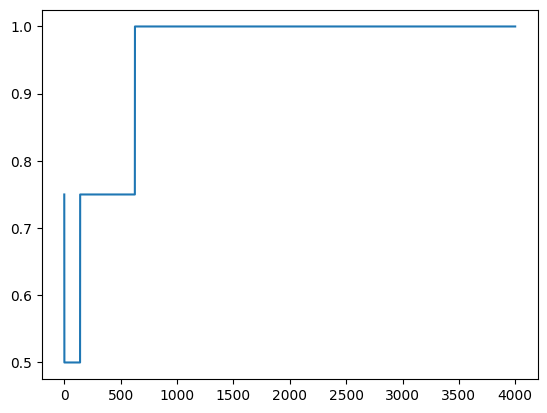

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'], label = 'train')
plt.show()

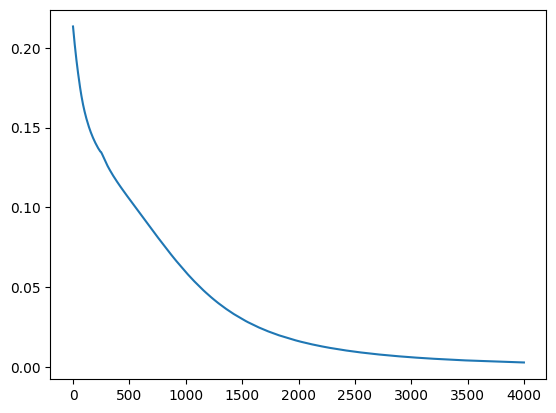

In [20]:
plt.plot(history.history['loss'], label = 'train')
plt.show()

In [21]:
scores = model.evaluate(training_data, target_data)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - binary_accuracy: 1.0000 - loss: 0.0028

Accuracy: 100.00%


****

*Creado por:*

*Isabel Maniega*